### Monte Carlo Simulation

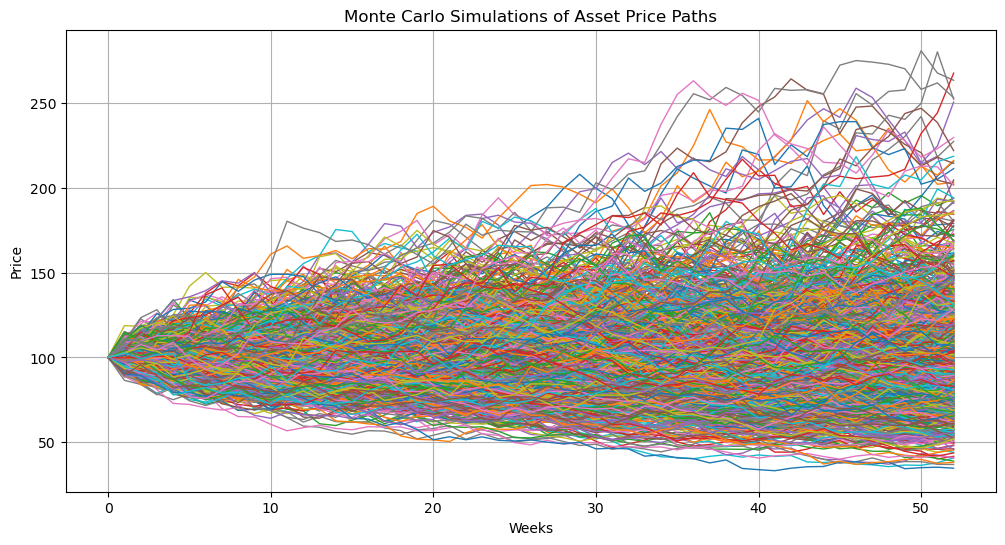

In [57]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Initial Model Parameters
S0 = 100  # Initial spot price
r = 0.05  # Risk-free interest rate
sigma = 0.35  # Volatility of returns
K = 105  # Strike price
T = 1.0  # Time to maturity

N = 10000  # Number of realizations for Monte Carlo simulation

# Parameters for Monte Carlo simulation of path
weeks = 52
dt = T / weeks  # Time step
S = np.zeros((weeks + 1, N))  # Matrix to store price paths
S[0] = S0

# Generate the paths
for t in range(1, weeks + 1):
    # Apply Geometric Brownian Motion SDE
    Z = np.random.normal(size=N)
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Plot a paths to visualize the simulation
plt.figure(figsize=(12, 6))
for i in range(1000):  # Simulate 10000 price paths
    plt.plot(range(weeks + 1), S[:, i], lw=1)

plt.title("Monte Carlo Simulations of Asset Price Paths")
plt.xlabel("Weeks")
plt.ylabel("Price")
plt.grid(True)
plt.show()


### Calculating Call Option prices with Black Scholes

In [45]:
def black_scholes(S0, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        price = (S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    else:
        price = (K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1))
    return price

# Given parameters

# Calculate Black-Scholes price
bs_call_price = black_scholes(S0, K, T, r, sigma, option_type="call")

# Calculating the payoffs for a call option using the final prices from the Monte Carlo simulation
mc_call_payoffs = np.maximum(S[weeks] - K, 0)
mc_call_price = np.mean(mc_call_payoffs) * np.exp(-r * T)

print(f"Volatility Level: {sigma}")
print(f"Black-Scholes Call Price: {bs_call_price:.2f}")
print(f"Monte Carlo Call Price: {mc_call_price:.2f}")


Volatility Level: 0.35
Black-Scholes Call Price: 13.94
Monte Carlo Call Price: 14.06


### Monte Carlo prices compared to Black Scholes over different volatility values

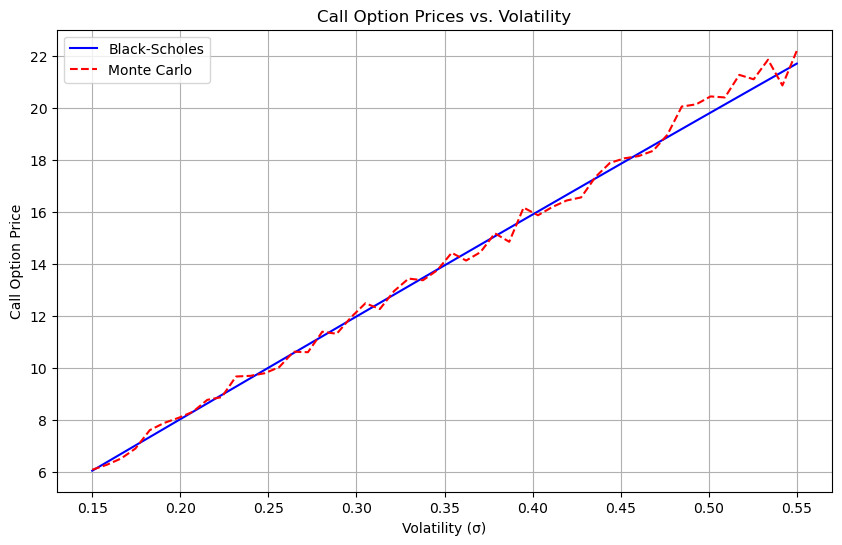

In [48]:
# Parameters for the plot
volatility_levels = np.linspace(0.15, 0.55, 50)  # Volatility range from 10% to 50%
bs_call_prices = []
mc_call_prices = []

# Recalculate Black-Scholes and Monte Carlo prices for each volatility level
for sigma in volatility_levels:
    # Black-Scholes prices
    bs_call_prices.append(black_scholes(S0, K, T, r, sigma, option_type="call"))

    # Monte Carlo prices
    ST_varying_sigma = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.normal(size=N))
    mc_call_payoffs = np.maximum(ST_varying_sigma - K, 0)
    mc_call_price = np.mean(mc_call_payoffs) * np.exp(-r * T)
    mc_call_prices.append(mc_call_price)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(volatility_levels, bs_call_prices, label='Black-Scholes', color='blue')
plt.plot(volatility_levels, mc_call_prices, label='Monte Carlo', color='red', linestyle='--')
plt.title('Call Option Prices vs. Volatility')
plt.xlabel('Volatility (σ)')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()


### Monte Carlo Accuracy vs Number of Price Paths

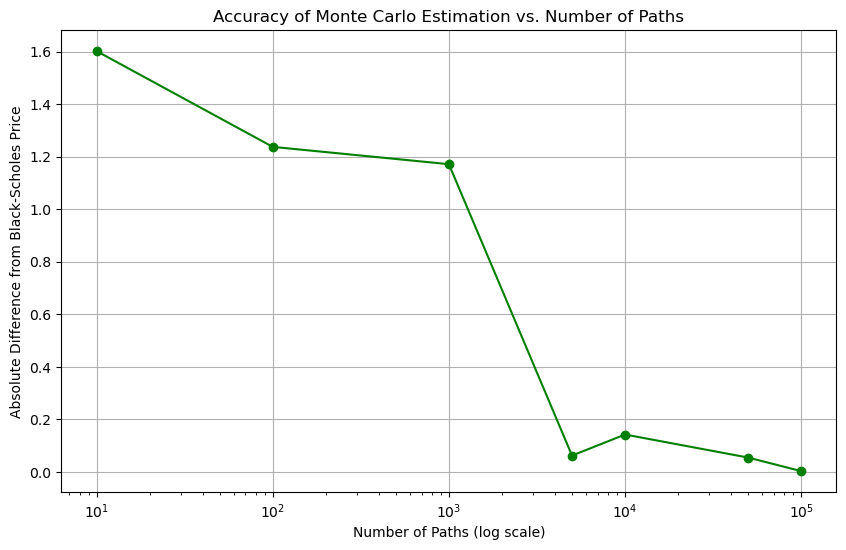

In [66]:
# Redefining the simulation environment with a fixed volatility
sigma_fixed = 0.25  # Fixed volatility

# Path numbers to simulate
path_numbers = np.array([10, 100, 1000, 5000, 10000, 50000, 100000])

# Black-Scholes price (constant for all simulations)
bs_call_price_fixed = black_scholes(S0, K, T, r, sigma_fixed, option_type="call")
mc_price_differences = []

# Calculate Monte Carlo price for varying number of paths and measure the difference from BS price
for num_paths in path_numbers:
    ST_mc = S0 * np.exp((r - 0.5 * sigma_fixed**2) * T + sigma_fixed * np.sqrt(T) * np.random.normal(size=num_paths))
    mc_call_payoffs = np.maximum(ST_mc - K, 0)
    mc_call_price = np.mean(mc_call_payoffs) * np.exp(-r * T)
    difference = abs(mc_call_price - bs_call_price_fixed)
    mc_price_differences.append(difference)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(path_numbers, mc_price_differences, marker='o', linestyle='-', color='green')
plt.title('Accuracy of Monte Carlo Estimation vs. Number of Paths')
plt.xlabel('Number of Paths (log scale)')
plt.xscale('log')
plt.ylabel('Absolute Difference from Black-Scholes Price')

plt.grid(True)
plt.show()
